In [36]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [37]:
cred = pd.read_csv('movies-credit-students-train.csv')

df = pd.read_csv('movies-classification-dataset.csv')

df = df.merge(cred, on='title')

In [38]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,viewercount,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_count,Rate,movie_id,cast,crew
0,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.maoslastdancermovie.com/,33870,"[{""id"": 4328, ""name"": ""costume""}, {""id"": 4528,...",en,Mao's Last Dancer,"At the age of 11, Li was plucked from a poor C...",1.876811,"[{""name"": ""Great Scott Productions Pty. Ltd."",...",...,117.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,最后的舞者,Mao's Last Dancer,28,High,33870,"[{""cast_id"": 2, ""character"": ""Li Cunxin - adul...","[{""credit_id"": ""52fe45419251416c9102c18d"", ""de..."
1,38000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,193,"[{""id"": 10988, ""name"": ""based on tv series""}, ...",en,Star Trek: Generations,Captain Jean-Luc Picard and the crew of the En...,14.779041,"[{""name"": ""Paramount Pictures"", ""id"": 4}]",...,118.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Boldly go.,Star Trek: Generations,452,Intermediate,193,"[{""cast_id"": 5, ""character"": ""Captain Jean-Luc...","[{""credit_id"": ""52fe4225c3a36847f8007717"", ""de..."
2,20000000,"[{""id"": 36, ""name"": ""History""}, {""id"": 18, ""na...",http://focusfeatures.com/film/milk/,10139,"[{""id"": 237, ""name"": ""gay""}, {""id"": 582, ""name...",en,Milk,The story of California's first openly gay ele...,30.909699,"[{""name"": ""Focus Features"", ""id"": 10146}]",...,128.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Never Blend In.,Milk,612,High,10139,"[{""cast_id"": 2, ""character"": ""Harvey Milk"", ""c...","[{""credit_id"": ""52fe43339251416c7500756b"", ""de..."
3,23000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,11632,"[{""id"": 212, ""name"": ""london england""}, {""id"":...",en,Vanity Fair,"Beautiful, funny, passionate, and calculating,...",6.618149,"[{""name"": ""Alliance Films"", ""id"": 2514}, {""nam...",...,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"On September 1st, a heroine will rise.",Vanity Fair,73,Intermediate,11632,"[{""cast_id"": 22, ""character"": ""Becky Sharp"", ""...","[{""credit_id"": ""52fe446c9251416c75034365"", ""de..."
4,52000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.frompariswithlovefilm.com/,26389,"[{""id"": 90, ""name"": ""paris""}, {""id"": 591, ""nam...",en,From Paris with Love,James Reese has a good job as an ambassador's ...,27.916284,"[{""name"": ""Apipoula\u00ef"", ""id"": 1076}, {""nam...",...,92.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,Two agents. One city. No merci.,From Paris with Love,675,Intermediate,26389,"[{""cast_id"": 3, ""character"": ""Charlie Wax"", ""c...","[{""credit_id"": ""5763f7b792514134cd00026b"", ""de..."


In [39]:
df.shape

(3037, 23)

In [40]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
print("train_data " , train_data.shape)
print("test_data " , test_data.shape)

train_data  (2429, 23)
test_data  (608, 23)


In [41]:
# Extract TLD from homepage
from urllib.parse import urlparse

def extract_tld(col):
    lst = []
    for url in col:
        if url is None:
            lst.append(None)
        elif isinstance(url, float):
            lst.append(None)
        else:
            domain = urlparse(url).netloc
            tld = domain.split('.')[-1]
            lst.append(tld)
    return lst

In [42]:
train_data['tld'] = extract_tld(train_data['homepage'])

In [43]:
train_data['tld'].value_counts()

com         827
net          27
uk           11
de           10
movie         8
org           4
au            3
fr            3
ru            2
cn            2
ca            2
jp            1
it            1
dk            1
ch http:      1
hk            1
za            1
ie            1
Name: tld, dtype: int64

In [44]:
train_data['tld'].isnull().sum()

1523

In [45]:
train_data['tld'] = train_data['tld'].fillna('com')

In [46]:
train_data = train_data.drop(columns = ['homepage'], axis = 1)

In [47]:
# check if there are any null values
print(train_data.isnull().sum())

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  1
viewercount               0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                   1
spoken_languages          0
status                    0
tagline                 314
title                     0
vote_count                0
Rate                      0
movie_id                  0
cast                      0
crew                      0
tld                       0
dtype: int64


In [48]:
train_data['tagline'] = train_data['tagline'].fillna('Unknown')
train_data = train_data.dropna()
print(train_data.isnull().sum())

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
viewercount             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_count              0
Rate                    0
movie_id                0
cast                    0
crew                    0
tld                     0
dtype: int64


In [49]:
#check if there are any duplicated rows
DRows = train_data[train_data.duplicated()]
print(DRows)

Empty DataFrame
Columns: [budget, genres, id, keywords, original_language, original_title, overview, viewercount, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, tagline, title, vote_count, Rate, movie_id, cast, crew, tld]
Index: []

[0 rows x 23 columns]


In [50]:
def drop_outliers(data, thresh):
  numeric_features = data.drop(columns = ['id', 'original_language','original_title', 'overview' ,
                                     'status', 'tagline' ,'title', 'tld' , 'spoken_languages', 'genres',
                                      'production_companies', 'production_countries', 'keywords', 'release_date',
                                      'cast', 'crew', 'movie_id', 'Rate'], axis = 1)
  new_df = data.copy()
  for col in numeric_features.columns:
      z_scores = (new_df[col] - new_df[col].mean()) / new_df[col].std()
      outliers = new_df[abs(z_scores) > thresh]
      new_df.drop(outliers.index, inplace=True)

  return new_df

In [51]:
train_data = drop_outliers(train_data, 3)

train_data.shape

(2194, 23)

In [52]:
#Extract features from Dictionary
import json
def extract_name(col, df, new_col):
    df[col] = df[col].apply(lambda x: json.loads(x) if x is not None else [])
    df[new_col] = df[col].apply(lambda x: [dict_['name'] for dict_ in x] if x else [])
    df[new_col] = df[new_col].apply(lambda x: ', '.join(x) if x else '')
    df.drop(col, axis=1, inplace=True)

In [53]:
extract_name('spoken_languages', train_data, 'Lang')
extract_name('genres', train_data, 'genre_names')
extract_name('production_companies', train_data, 'production_company')
extract_name('production_countries', train_data, 'production_country')
extract_name('keywords', train_data, 'keyword')

In [54]:
train_data['genre_names']

227                       Drama, Foreign, Romance
365     Action, Horror, Science Fiction, Thriller
2501                               Romance, Drama
2001                       Crime, Drama, Thriller
1811                              Comedy, Romance
                          ...                    
466                           Drama, History, War
2169                                      Romance
1638                                        Drama
1130                       Comedy, Drama, Romance
860                               Comedy, Romance
Name: genre_names, Length: 2194, dtype: object

In [55]:
# Extract Director from Crew 
def extract_features(data, crew):
    data['Director'] = data[crew].apply(json.loads)
    data['Director'] = data['Director'].apply(lambda x: [d['name'] for d in x if d['job'] == 'Director'])
    data['Director'] = data['Director'].apply(lambda x: x[0] if len(x) > 0 else '')
    data.drop(columns=[crew], axis=1, inplace=True)

In [56]:
extract_features(train_data, 'crew')

# train_data['Director'][227]

In [57]:
train_data['Director'][227]

'Vic Sarin'

In [58]:
def main_actores(data, cast):
  data['cast_names'] = data[cast].apply(json.loads)
  data['cast_names'] = data['cast_names'].apply(lambda x: [item['name'] for item in x[:3]] if len(x) > 0 else [])
  data.drop(columns = [cast], axis = 1 , inplace = True)

main_actores(train_data, 'cast')
train_data['cast_names']

227           [Kristin Kreuk, Jimi Mistry, Neve Campbell]
365                [Roddy Piper, Keith David, Meg Foster]
2501             [Meryl Streep, Amy Adams, Stanley Tucci]
2001    [Matthew McConaughey, Emile Hirsch, Thomas Had...
1811    [Queen Latifah, Alicia Silverstone, Andie MacD...
                              ...                        
466                   [Christian Bale, Ni Ni, Tong Dawei]
2169    [John Travolta, Olivia Newton-John, Stockard C...
1638     [Julian Sands, Saffron Burrows, Justin Chadwick]
1130       [Morris Chestnut, D. L. Hughley, Bill Bellamy]
860              [Kristen Wiig, Rose Byrne, Maya Rudolph]
Name: cast_names, Length: 2194, dtype: object

In [59]:
# Extract the Release year from Release date 
from datetime import datetime
def Extract_year(data):
  data['release_date'] = pd.to_datetime(data['release_date'], dayfirst=True)
  data['release_year'] = data['release_date'].dt.year
  data.drop(columns = ['release_date'], axis = 1, inplace = True)

Extract_year(train_data)

train_data.head()

,budget,id,original_language,original_title,overview,viewercount,revenue,runtime,status,tagline,...,movie_id,tld,Lang,genre_names,production_company,production_country,keyword,Director,cast_names,release_year
227,0,14608,en,Partition,"Determined to leave the ravages of war behind,...",2.131524,0,116.0,Released,Unknown,...,14608,com,English,"Drama, Foreign, Romance","Partition Films%2C Inc., Khussro Films","Canada, South Africa, United Kingdom","drama, independent film",Vic Sarin,"[Kristin Kreuk, Jimi Mistry, Neve Campbell]",2007
365,4000000,8337,en,They Live,"Nada, a down-on-his-luck construction worker, ...",29.852608,13008928,94.0,Released,Who are they? And what do they want?,...,8337,com,English,"Action, Horror, Science Fiction, Thriller","Universal Pictures, Alive Films, Larry Franco ...",United States of America,"dystopia, social commentary, alien invasion, s...",John Carpenter,"[Roddy Piper, Keith David, Meg Foster]",1988
2501,40000000,24803,en,Julie & Julia,Julia Child and Julie Powell – both of whom wr...,22.853006,129540499,123.0,Released,Based on Two True Stories,...,24803,com,"English, Français","Romance, Drama","Columbia Pictures, Scott Rudin Productions, Ea...",United States of America,"cooking, book, cookbook, blog, recipe, woman d...",Nora Ephron,"[Meryl Streep, Amy Adams, Stanley Tucci]",2009
2001,10000000,73567,en,Killer Joe,A cop (Matthew McConaughey) who moonlights as ...,16.436178,3665069,102.0,Released,A Totally Deep-Fried Texas Redneck Trailer Par...,...,73567,com,English,"Crime, Drama, Thriller","Voltage pictures, Worldview Entertainment, ANA...",United States of America,"trailer park, gun, texas, deal, psychopath, se...",William Friedkin,"[Matthew McConaughey, Emile Hirsch, Thomas Had...",2011
1811,25000000,14177,en,Beauty Shop,You thought you'd heard it all in the barbersh...,5.625632,36351350,105.0,Released,A Cut Above,...,14177,com,English,"Comedy, Romance",Metro-Goldwyn-Mayer (MGM),United States of America,,Bille Woodruff,"[Queen Latifah, Alicia Silverstone, Andie MacD...",2005


In [60]:
def get_list(data, col):
  copied_df = data.copy()
  copied_df[col] = copied_df[col].str.split(",")
  copied_df = copied_df.explode(col)
  lst = set(copied_df[col].str.strip().unique().tolist())
  lst.discard('')
  return lst

In [61]:
lang_list = get_list(train_data, 'Lang')
print(len(lang_list))
print(lang_list)

53
{'Dansk', 'Český', 'Español', 'Srpski', 'Afrikaans', 'Norsk', 'اردو', 'No Language', 'Український', 'Română', 'Português', 'Esperanto', 'Somali', 'தமிழ்', 'Deutsch', 'Tiếng Việt', 'Latin', 'svenska', '한국어/조선말', 'isiZulu', 'עִבְרִית', 'Gaeilge', 'English', 'فارسی', 'हिन्दी', 'Pусский', 'suomi', 'български език', 'বাংলা', 'Italiano', 'Cymraeg', 'ਪੰਜਾਬੀ', 'Kiswahili', '广州话 / 廣州話', 'Galego', '普通话', 'ภาษาไทย', 'Magyar', 'Hrvatski', '日本語', 'ქართული', 'қазақ', 'Türkçe', 'Polski', 'Français', 'Slovenčina', 'العربية', 'Nederlands', 'Bosanski', 'Íslenska', 'shqip', 'ελληνικά', 'తెలుగు'}


In [62]:
genre_list = get_list(train_data, 'genre_names')
print(genre_list)
len(genre_list)

{'Western', 'Drama', 'Mystery', 'Thriller', 'Adventure', 'TV Movie', 'Family', 'Romance', 'Documentary', 'Comedy', 'Science Fiction', 'Animation', 'Foreign', 'Fantasy', 'War', 'Action', 'History', 'Music', 'Crime', 'Horror'}


20

In [63]:
country_list = get_list(train_data,'production_country')
print(country_list)
len(country_list)


{'Aruba', 'Netherlands', 'Slovakia', 'Brazil', 'Mexico', 'Bosnia and Herzegovina', 'Kazakhstan', 'Fiji', 'Japan', 'Pakistan', 'India', 'Germany', 'Ukraine', 'China', 'France', 'Poland', 'Malaysia', 'Austria', 'New Zealand', 'Russia', 'South Africa', 'Panama', 'Portugal', 'Switzerland', 'Philippines', 'Bolivia', 'Iceland', 'Argentina', 'Tunisia', 'South Korea', 'Denmark', 'Norway', 'Czech Republic', 'Belgium', 'United Arab Emirates', 'Taiwan', 'Romania', 'Australia', 'Spain', 'United Kingdom', 'Morocco', 'Ireland', 'Thailand', 'Hong Kong', 'Italy', 'United States of America', 'Hungary', 'Bulgaria', 'Serbia', 'Finland', 'Cambodia', 'Sweden', 'Israel', 'Luxembourg', 'Canada'}


55

In [64]:
company_list = get_list(train_data, 'production_company')
len(company_list)

2775

In [65]:
keyword_list = get_list(train_data, 'keyword')
len(keyword_list)

6363

In [66]:
# One Hot Encoding 
def one_hot_encoding(data, lst, col):
  for item in lst:
    data[item] = data[col].apply(lambda x: 1 if item in x else 0)
  data.drop(columns = [col], axis = 1, inplace = True)

In [67]:
one_hot_encoding(train_data, genre_list, 'genre_names')
train_data.shape

(2194, 42)

In [68]:
one_hot_encoding(train_data, country_list, 'production_country')
train_data.shape

(2194, 96)

In [69]:

one_hot_encoding(train_data, lang_list, 'Lang')
train_data.shape

(2194, 148)

In [70]:
tld_list = train_data['tld'].unique()
one_hot_encoding(train_data, tld_list, 'tld')
train_data.shape

(2194, 165)

In [71]:
# splits each string into a list of words using whitespace as the delimiter
train_data['overview'] = train_data['overview'].apply(lambda x:x.split())
train_data['tagline'] = train_data['tagline'].apply(lambda x:x.split())

In [72]:
def Remove_spaces(col):
    lst = []
    for item in col:
        item = item.replace(" ","")
        lst.append(item)
    return lst

In [73]:
train_data['cast_names'] = train_data['cast_names'].apply(Remove_spaces)
train_data['Director'] = train_data['Director'].apply(Remove_spaces)
train_data['production_company']  =  train_data['production_company'].apply(Remove_spaces)
train_data['keyword'] = train_data['keyword'].apply(Remove_spaces)

In [74]:
train_data['tags'] = train_data['tagline'] + train_data['overview'] + train_data['production_company'] + train_data['keyword'] + train_data['Director'] + train_data['cast_names']
train_data = train_data.drop(columns = ['tagline', 'overview','production_company','keyword','Director','cast_names'])
train_data['tags'] = train_data['tags'].apply(lambda x: " ".join(x))

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv = CountVectorizer(max_features=5000,stop_words='english')

vec = cv.fit_transform(train_data['tags']).toarray()
similarity = cosine_similarity(vec)

average_similarity = np.mean(similarity, axis=1)

print(average_similarity)

[0.04800423 0.01588566 0.01756544 ... 0.03630281 0.02305861 0.02690622]


In [76]:
train_data = train_data.drop(columns = ['tags'], axis = 1)
combined_features = np.column_stack((train_data, average_similarity))

In [77]:
train_data.shape

(2194, 159)

In [78]:
combined_features.shape

(2194, 160)

In [79]:
col_names = train_data.columns.tolist()
col_names.append('tags')
train_data = pd.DataFrame(combined_features, columns = col_names)

train_data.head()

,budget,id,original_language,original_title,viewercount,revenue,runtime,status,title,vote_count,...,movie,dk,ch http:,ru,hk,za,cn,ca,ie,tags
0,0,14608,en,Partition,2.131524,0,116.0,Released,Partition,6,...,0,0,0,0,0,0,0,0,0,0.048004
1,4000000,8337,en,They Live,29.852608,13008928,94.0,Released,They Live,550,...,0,0,0,0,0,0,0,0,0,0.015886
2,40000000,24803,en,Julie & Julia,22.853006,129540499,123.0,Released,Julie & Julia,560,...,0,0,0,0,0,0,0,0,0,0.017565
3,10000000,73567,en,Killer Joe,16.436178,3665069,102.0,Released,Killer Joe,425,...,0,0,0,0,0,0,0,0,0,0.029361
4,25000000,14177,en,Beauty Shop,5.625632,36351350,105.0,Released,Beauty Shop,115,...,0,0,0,0,0,0,0,0,0,0.004694


In [80]:
train_data['original_language'].value_counts()

en    2078
fr      37
zh      18
es      10
de       9
ru       7
hi       6
cn       6
ko       5
ja       3
it       3
pt       2
th       2
da       2
sv       1
ta       1
cs       1
hu       1
te       1
nl       1
Name: original_language, dtype: int64

In [81]:
en_count = train_data['original_language'].value_counts()[0]
en_count

2078

([<matplotlib.patches.Wedge at 0x1bae1dac2b0>,
 [Text(-0.18187168053317412, -1.0848606785297545, 'English'),
  Text(0.1818716678366755, 1.0848606806582615, 'other Languages')],
 [Text(-0.09920273483627678, -0.591742188288957, '94.7%'),
  Text(0.09920272791091389, 0.5917421894499607, '5.3%')])

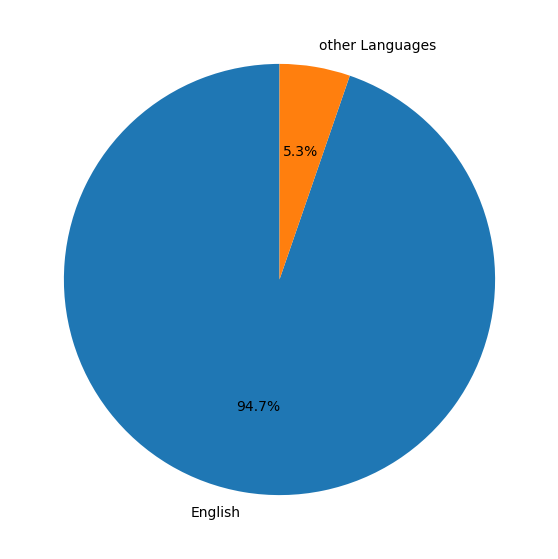

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = np.array(['English','other Languages'])
perc = np.array([en_count, sum(train_data['original_language'].value_counts()) - en_count])

plt.figure(figsize=(7,7))
plt.pie(perc, labels=labels, autopct='%1.1f%%', startangle=90)

In [83]:
train_data['original_language'] = train_data['original_language'].apply(lambda x: 1 if 'en' == x else 0)

train_data['original_language'].value_counts()

1    2078
0     116
Name: original_language, dtype: int64

In [84]:
train_data['status'].unique()


array(['Released', 'Post Production'], dtype=object)

In [85]:
train_data['status'] = train_data['status'].apply(lambda x: 1 if 'Released' == x else 0)

train_data = train_data.drop(columns = ['id', 'original_title', 'title' , 'movie_id'], axis = 1)

x_train = train_data.drop(columns = ['Rate'], axis = 1)
y_train = train_data['Rate']


In [86]:
#encoding = {'High': 2, 'Intermediate': 1, 'Low': 0}

#train_data['Rate'] = train_data['Rate'].map(encoding)

#y_train = train_data['Rate']

In [87]:
train_data['Rate'].value_counts()

Intermediate    1403
High             592
Low              199
Name: Rate, dtype: int64

In [88]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
feature_selector = SelectKBest(score_func=f_classif, k= 20)
fit = feature_selector.fit(x_train, y_train)
features = fit.transform(x_train)
features[0,:]

array([0, 1, 2.131524, 0, 116.0, 6, 2007, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0.048004233668457706], dtype=object)

In [89]:
names = x_train.columns[feature_selector.get_support()]
names

Index(['budget', 'original_language', 'viewercount', 'revenue', 'runtime',
       'vote_count', 'release_year', 'Drama', 'Thriller', 'Comedy',
       'Science Fiction', 'War', 'Action', 'History', 'Horror',
       'United Kingdom', 'Italy', 'United States of America', 'English',
       'tags'],
      dtype='object')

In [90]:
x_train = train_data[names]
y_train = train_data['Rate']

In [91]:
x_train.head()

,budget,original_language,viewercount,revenue,runtime,vote_count,release_year,Drama,Thriller,Comedy,Science Fiction,War,Action,History,Horror,United Kingdom,Italy,United States of America,English,tags
0,0,1,2.131524,0,116.0,6,2007,1,0,0,0,0,0,0,0,1,0,0,1,0.048004
1,4000000,1,29.852608,13008928,94.0,550,1988,0,1,0,1,0,1,0,1,0,0,1,1,0.015886
2,40000000,1,22.853006,129540499,123.0,560,2009,1,0,0,0,0,0,0,0,0,0,1,1,0.017565
3,10000000,1,16.436178,3665069,102.0,425,2011,1,1,0,0,0,0,0,0,0,0,1,1,0.029361
4,25000000,1,5.625632,36351350,105.0,115,2005,0,0,1,0,0,0,0,0,0,0,1,1,0.004694


In [92]:
def proprocessing(dataset):
 
  
  dataset = dataset.drop_duplicates()
  dataset = drop_outliers(dataset, 3)
  extract_name('spoken_languages', dataset, 'Lang')
  extract_name('genres', dataset, 'genre_names')
  extract_name('production_companies', dataset, 'production_company')
  extract_name('production_countries', dataset, 'production_country')
  extract_name('keywords', dataset, 'keyword')
  extract_features(dataset, 'crew')
  main_actores(dataset, 'cast')
  Extract_year(dataset)
  one_hot_encoding(dataset, genre_list, 'genre_names')
  one_hot_encoding(dataset, country_list, 'production_country')
  one_hot_encoding(dataset, lang_list, 'Lang')
  one_hot_encoding(dataset, tld_list, 'tld')
  return dataset

In [93]:
def processing2(dataset):
  dataset['overview'] = dataset['overview'].apply(lambda x:x.split())
  dataset['tagline'] = dataset['tagline'].apply(lambda x:x.split())

  dataset['cast_names'] = dataset['cast_names'].apply(Remove_spaces)
  dataset['Director'] = dataset['Director'].apply(Remove_spaces)
  dataset['production_company']  =  dataset['production_company'].apply(Remove_spaces)
  dataset['keyword'] = dataset['keyword'].apply(Remove_spaces)

  dataset['tags'] = dataset['tagline'] + dataset['overview'] + dataset['production_company'] + dataset['keyword'] + dataset['Director'] + dataset['cast_names']
  dataset = dataset.drop(columns = ['tagline', 'overview','production_company','keyword','Director','cast_names'])
  dataset['tags'] = dataset['tags'].apply(lambda x: " ".join(x))

  vec_test = cv.transform(dataset['tags']).toarray()
  similarity_test = cosine_similarity(vec_test)
  similarity_mean = np.mean(similarity_test, axis = 1)
  similarity_mean_column = similarity_mean.reshape(-1, 1)
  

  dataset = dataset.drop(columns = ['tags'], axis = 1)
  combined_features2 = np.column_stack((dataset, similarity_mean_column))


  col_names2 = dataset.columns.tolist()
  col_names2.append('tags')
  dataset = pd.DataFrame(combined_features2, columns = col_names2)

  dataset['original_language'] = dataset['original_language'].apply(lambda x: 1 if 'en' == x else 0)
  dataset['status'] = dataset['status'].apply(lambda x: 1 if 'Released' == x else 0)
  dataset = dataset.drop(columns = ['id', 'original_title', 'title' , 'movie_id'], axis = 1)
  return dataset

In [94]:
### Transforming Test Data
# Missing Values
test_data['tld'] = extract_tld(test_data['homepage'])
test_data = test_data.drop(columns = ['homepage'], axis = 1)
test_data['tld'] = test_data['tld'].fillna('com')
test_data['tagline'] = test_data['tagline'].fillna('Unknown')
test_data = test_data.dropna()
test_data.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
viewercount             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_count              0
Rate                    0
movie_id                0
cast                    0
crew                    0
tld                     0
dtype: int64

In [95]:
test_data.head()

,budget,genres,id,keywords,original_language,original_title,overview,viewercount,production_companies,production_countries,...,spoken_languages,status,tagline,title,vote_count,Rate,movie_id,cast,crew,tld
1721,0,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 107...",36970,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 658, ""na...",en,Oceans,"An ecological drama/documentary, filmed throug...",10.706613,"[{""name"": ""Path\u00e9 Films"", ""id"": 4959}, {""n...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,Explore the depths of our planet's oceans. Ex...,Oceans,111,High,36970,"[{""cast_id"": 3, ""character"": ""Narrator (voice:...","[{""credit_id"": ""54186c670e0a2637f900366f"", ""de...",com
2334,58800000,"[{""id"": 10752, ""name"": ""War""}, {""id"": 28, ""nam...",190859,"[{""id"": 1589, ""name"": ""sniper""}, {""id"": 5565, ...",en,American Sniper,U.S. Navy SEAL Chris Kyle takes his sole missi...,87.534370,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The most lethal sniper in U.S. history.,American Sniper,4469,High,190859,"[{""cast_id"": 44, ""character"": ""Chris Kyle"", ""c...","[{""credit_id"": ""52fe4c6f9251416c910f4d57"", ""de...",com
443,28000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",318846,"[{""id"": 974, ""name"": ""bank""}, {""id"": 4373, ""na...",en,The Big Short,The men who made millions from a global econom...,57.518472,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,This is a true story.,The Big Short,2607,High,318846,"[{""cast_id"": 2, ""character"": ""Michael Burry"", ...","[{""credit_id"": ""568349e09251414f6300f7b7"", ""de...",com
2332,30000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",9920,"[{""id"": 1418, ""name"": ""skyscraper""}, {""id"": 31...",en,Ultraviolet,"In the late 21st century, a subculture of huma...",15.895340,"[{""name"": ""Screen Gems"", ""id"": 3287}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The blood war is on.,Ultraviolet,458,Low,9920,"[{""cast_id"": 22, ""character"": ""Violet Song Jat...","[{""credit_id"": ""58a4c23ac3a3686cc2008ab8"", ""de...",com
2883,35000000,"[{""id"": 18, ""name"": ""Drama""}]",39486,"[{""id"": 643, ""name"": ""horse race""}, {""id"": 228...",en,Secretariat,Housewife and mother Penny Chenery agrees to t...,9.525037,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Impossible True Story,Secretariat,103,High,39486,"[{""cast_id"": 1, ""character"": ""Penny Chenery"", ...","[{""credit_id"": ""52fe471e9251416c9106a99f"", ""de...",com


In [96]:
test_data = proprocessing(test_data)
test_data = processing2(test_data)

In [97]:
test_data.head()

,budget,original_language,viewercount,revenue,runtime,status,vote_count,Rate,release_year,Western,...,movie,dk,ch http:,ru,hk,za,cn,ca,ie,tags
0,0,1,10.706613,19406406,84.0,1,111,High,2009,0,...,0,0,0,0,0,0,0,0,0,0.02461
1,28000000,1,57.518472,133346506,130.0,1,2607,High,2015,0,...,0,0,0,0,0,0,0,0,0,0.022512
2,30000000,1,15.89534,31070211,87.0,1,458,Low,2006,0,...,0,0,0,0,0,0,0,0,0,0.029319
3,35000000,1,9.525037,60251371,123.0,1,103,High,2010,0,...,0,0,0,0,0,0,0,0,0,0.024217
4,50000000,1,9.622345,0,137.0,1,88,Intermediate,1999,0,...,0,0,0,0,0,0,0,0,0,0.022595


In [98]:
#test_data['Rate'] = test_data['Rate'].map(encoding)

In [99]:
train_columns = train_data.columns.tolist()

for column in train_columns:
    if column not in test_data.columns:
        test_data[column] = 0

In [100]:
x_test = test_data[names]
y_test = test_data['Rate']

In [101]:
x_test.head()

,budget,original_language,viewercount,revenue,runtime,vote_count,release_year,Drama,Thriller,Comedy,Science Fiction,War,Action,History,Horror,United Kingdom,Italy,United States of America,English,tags
0,0,1,10.706613,19406406,84.0,111,2009,0,0,0,0,0,0,0,0,0,0,0,0,0.02461
1,28000000,1,57.518472,133346506,130.0,2607,2015,1,0,1,0,0,0,0,0,0,0,1,1,0.022512
2,30000000,1,15.89534,31070211,87.0,458,2006,0,1,0,1,0,1,0,0,0,0,1,1,0.029319
3,35000000,1,9.525037,60251371,123.0,103,2010,1,0,0,0,0,0,0,0,0,0,1,1,0.024217
4,50000000,1,9.622345,0,137.0,88,1999,1,0,0,0,0,0,0,0,0,0,1,1,0.022595


In [102]:
# Data Scaling - Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled= scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

x_train_scaled[0]

array([-0.96439496,  0.23626872, -1.07240014, -0.75207204,  0.49622536,
       -0.86373498,  0.40615224,  1.03243081, -0.62197435, -0.80522337,
       -0.33468218, -0.18153976, -0.5734907 , -0.21039163, -0.3363637 ,
        2.42440569, -0.12732325, -2.39375466,  0.20682279,  3.74628083])

In [103]:
def evaluate_model(obj,x_train,y_train,x_test,y_test):
    start_train = time.time()
    obj.fit(x_train,y_train)
    train_time = time.time() - start_train

    start_test = time.time()
    y_pred = obj.predict(x_test)
    test_time = time.time() - start_test

    acc = accuracy_score(y_test, y_pred)
    print(obj.__class__.__name__)
    print('Accuracy of test:',acc)
    print('--------------------------------------------')
    return acc, train_time, test_time

In [104]:
import matplotlib.pyplot as plt
def plot_bar_graphs(lr, svc, k, dt):
  labels = ['LogisticRegression', 'SVC', 'KNeighbors', 'DecisionTree']
  values = [lr, svc, k, dt]

  plt.bar(labels, values)
  plt.tight_layout()
  plt.ylim([0, 1.0]) 
  plt.grid(axis='y') 
  plt.show()

In [105]:
# LogisticRegression
LR = LogisticRegression(C=0.03,solver = 'saga')
acc_lr, train_time_lr, test_time_lr = evaluate_model(LR,x_train_scaled,
                                        y_train,x_test_scaled,y_test)

LogisticRegression
Accuracy of test: 0.6985815602836879
--------------------------------------------


In [106]:
# SVM 
SVM_model = SVC(kernel='poly',degree = 1)
acc_svm, train_time_svm, test_time_svm = evaluate_model(SVM_model,x_train_scaled,
                                        y_train,x_test_scaled,y_test)

SVC
Accuracy of test: 0.7074468085106383
--------------------------------------------


In [107]:
Dtree = DecisionTreeClassifier(random_state=1, max_depth=7)
acc_dt, train_time_dt, test_time_dt = evaluate_model(Dtree,x_train_scaled,
                                        y_train,x_test_scaled,y_test)

DecisionTreeClassifier
Accuracy of test: 0.6702127659574468
--------------------------------------------


In [108]:
knn = KNeighborsClassifier(n_neighbors= 19, weights = 'uniform')
acc_knn, train_time_knn, test_time_knn = evaluate_model(knn,x_train_scaled,
                                        y_train,x_test_scaled,y_test)

KNeighborsClassifier
Accuracy of test: 0.675531914893617
--------------------------------------------


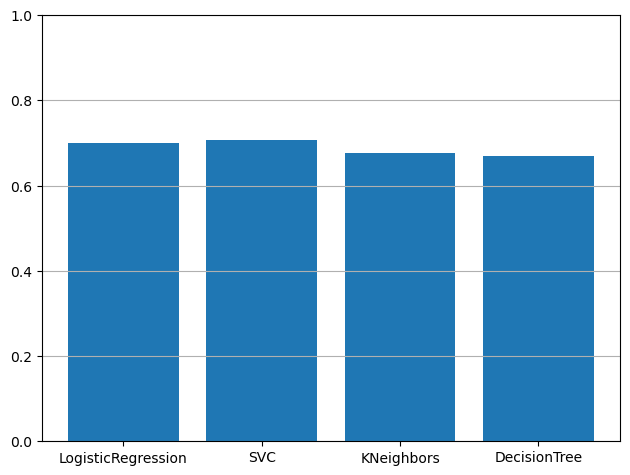

In [109]:
# Accuracy Comparison of 4 Models
plot_bar_graphs(acc_lr, acc_svm, acc_knn, acc_dt)

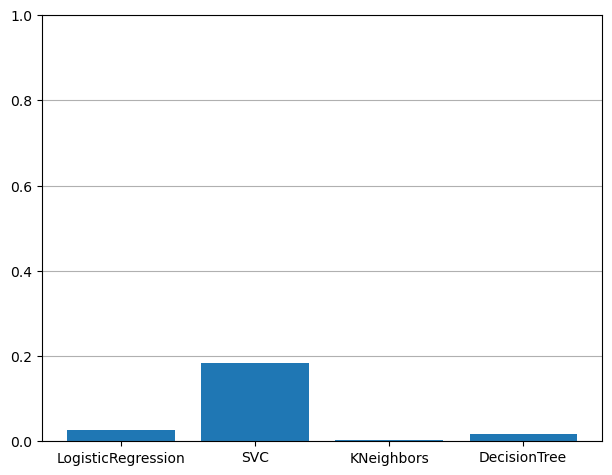

In [110]:
# Train Time Comparison of 4 Models
plot_bar_graphs(train_time_lr, train_time_svm, train_time_knn, train_time_dt)

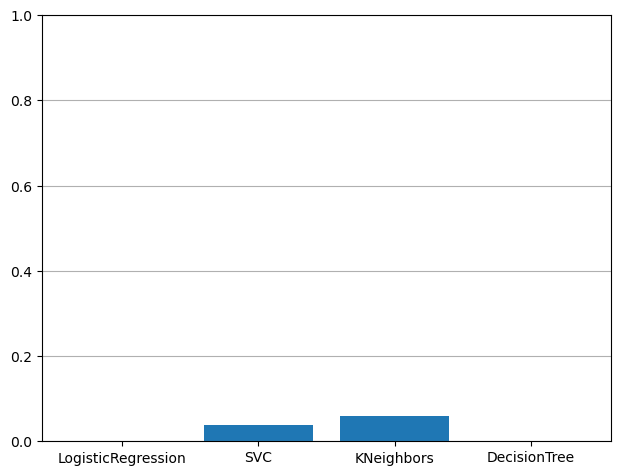

In [111]:
# Test Time Comparison of 4 Models
plot_bar_graphs(test_time_lr, test_time_svm, test_time_knn, test_time_dt)

In [112]:
import pickle
def save_trained_model(file_name, clf):
  with open(file_name, 'wb') as f:
      pickle.dump(clf, f)

In [113]:
save_trained_model('LR', LR)
save_trained_model('SVM', SVM_model)
save_trained_model('DecisionTree', Dtree)
save_trained_model('knn', knn)

In [114]:
###loading the models
def loading_models(file_name, new_X):
   with open(file_name, 'rb') as f:
       clf = pickle.load(f)
       predictions = clf.predict(new_X)
       return predictions

In [115]:
# test_script 
test_cred = pd.read_csv('tmdb_5000_credits.csv')
test_script = pd.read_csv('tmdb_5000_movies.csv')
test_script = test_script.merge(test_cred, on='title')

In [116]:
test_script['tld'] = extract_tld(test_script['homepage'])

In [117]:
test_script = test_script.drop(columns = ['homepage'], axis = 1)

In [118]:
def replace_nulls(data):
    for col in data.columns:
        mode = data[col].mode()
        if len(mode) > 0 and not pd.isnull(mode[0]):
            data[col].fillna(mode[0], inplace=True)
        else:
            second_mode = data[col].value_counts().index[1] if len(data[col].value_counts()) > 1 else None
            if second_mode is not None:
                data[col].fillna(second_mode, inplace=True)
            else:
                data[col].fillna(0, inplace=True)
    return data

In [119]:
### transforming test data
test_script_transformed = replace_nulls(test_script)
test_script_transformed = proprocessing(test_script_transformed)
test_script_transformed = processing2(test_script_transformed)

KeyError: "['Rate'] not found in axis"

In [ ]:
for column in train_columns:
    if column not in test_script_transformed.columns:
        test_script_transformed[column] = 0

x_test_script = test_script_transformed[names]
y_test_script = test_script_transformed['Rate']

In [ ]:
new_test_script = scaler.transform(x_test_script)

In [ ]:
LR_predictions = loading_models('LR', new_test_script)
LR_predictions

In [ ]:
acc1 = accuracy_score(y_test_script, LR_predictions)
    print("LOGISIC REGRESSION")
    print('Accuracy of test:',acc1)

In [ ]:
svm_predictions = loading_models('SVM', new_test_script)
svm_predictions

In [ ]:
acc2 = accuracy_score(y_test_script, svm_predictions)
    print("SVM")
    print('Accuracy of test:',acc2)

In [ ]:
knn_predictions = loading_models('knn', new_test_script)
knn_predictions

In [ ]:
acc3 = accuracy_score(y_test_script, knn_predictions)
    print("KNN")
    print('Accuracy of test:',acc3)

In [ ]:
dt_predictions = loading_models('DecisionTree', new_test_script)
dt_predictions

In [ ]:
acc4 = accuracy_score(y_test_script, dt_predictions)
    print("KNN")
    print('Accuracy of test:',acc4)